In [232]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [233]:

df=pd.read_csv(car_damage_claim_fraud.csv)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [234]:
df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [235]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')

In [236]:
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,2/12/2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,12/6/2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,5/5/2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


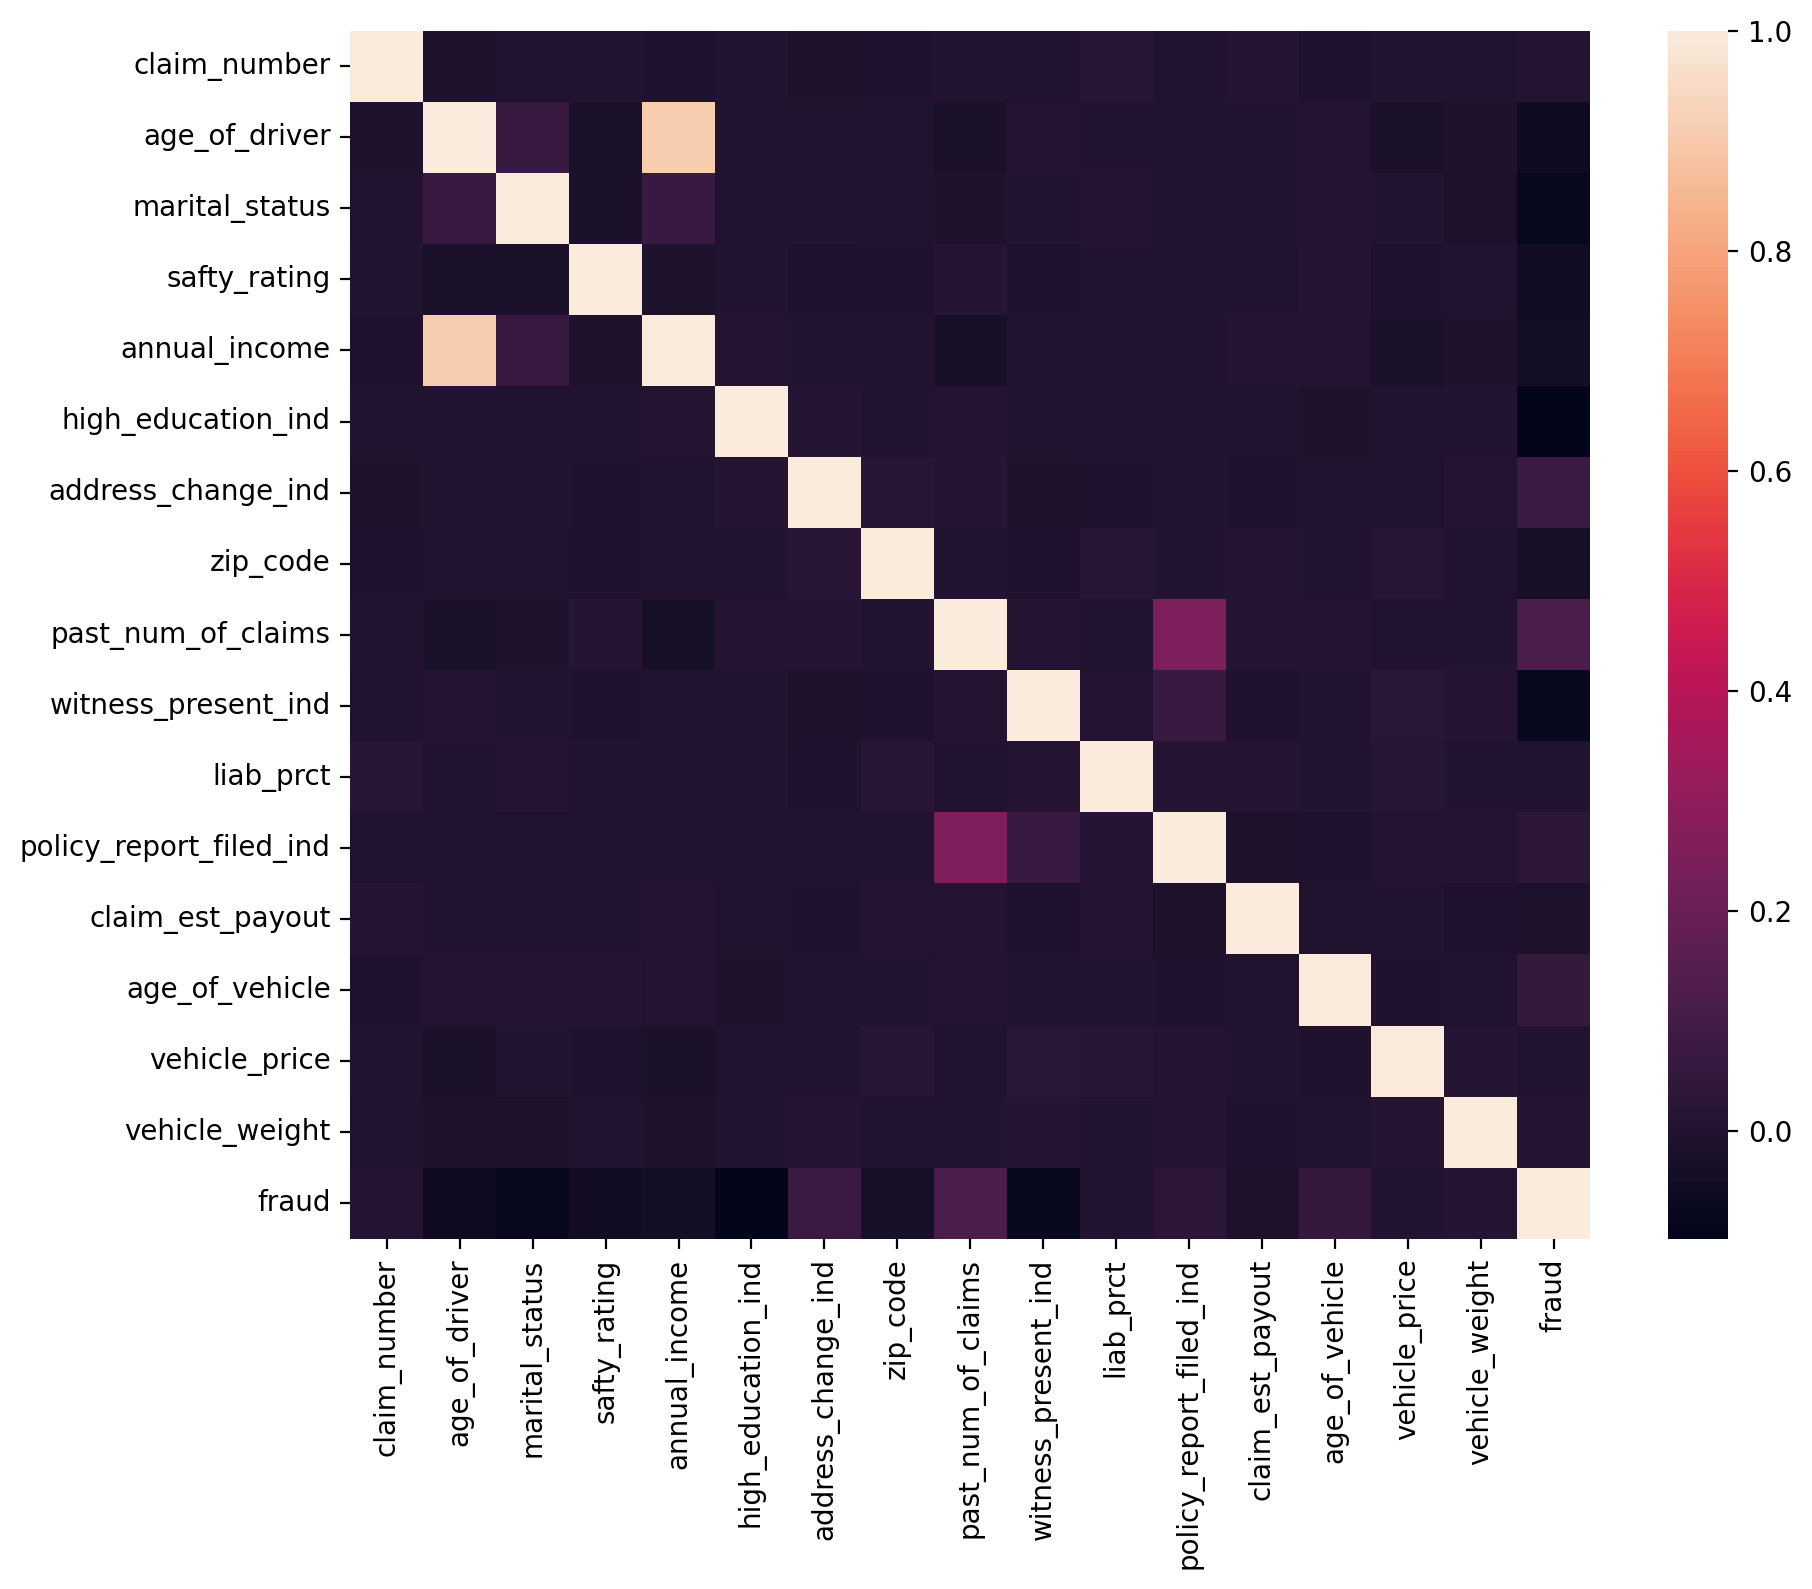

In [237]:
plt.figure(figsize=(10,8),dpi=200)
corr = df.corr()
sns.heatmap(data=corr)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.savefig(folder + 'corr' +'.png',dpi=200)
plt.show()

In [238]:
corr

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
claim_number,1.000000,-0.009338,-0.000652,0.002897,-0.004340,0.002919,-0.011654,-0.005396,0.001580,-0.002298,0.015418,-0.003159,0.009851,-0.006860,0.002604,-0.000266,0.007354
age_of_driver,-0.009338,1.000000,0.067701,-0.017472,0.907018,0.004196,0.001139,-0.000789,-0.024351,0.005660,0.003558,0.001919,0.004152,0.004695,-0.019054,-0.011288,-0.059291
marital_status,-0.000652,0.067701,1.000000,-0.019447,0.066652,-0.001694,0.001979,-0.003646,-0.010953,0.000993,0.005594,-0.001601,0.002612,0.008617,0.003811,-0.014006,-0.078435
safty_rating,0.002897,-0.017472,-0.019447,1.000000,-0.010767,0.003022,-0.006362,-0.006070,0.011475,-0.004910,0.004564,0.000303,0.004552,0.010194,-0.007130,-0.003219,-0.050729
annual_income,-0.004340,0.907018,0.066652,-0.010767,1.000000,0.005697,0.000613,0.002849,-0.026720,0.004480,0.002247,-0.001087,0.004927,0.005132,-0.020064,-0.012396,-0.045646
high_education_ind,0.002919,0.004196,-0.001694,0.003022,0.005697,1.000000,0.011387,0.001375,0.005842,0.000426,0.003031,0.001254,-0.000763,-0.009948,-0.000383,0.002621,-0.098350
address_change_ind,-0.011654,0.001139,0.001979,-0.006362,0.000613,0.011387,1.000000,0.017621,0.011188,-0.008678,-0.008025,-0.001388,-0.007199,-0.001380,-0.003597,0.004810,0.072249
zip_code,-0.005396,-0.000789,-0.003646,-0.006070,0.002849,0.001375,0.017621,1.000000,0.000380,-0.006883,0.014195,0.000617,0.005358,0.004063,0.021401,-0.001034,-0.032322
past_num_of_claims,0.001580,-0.024351,-0.010953,0.011475,-0.026720,0.005842,0.011188,0.000380,1.000000,0.005176,-0.001435,0.252123,0.006735,0.005403,-0.001025,0.001536,0.118596
witness_present_ind,-0.002298,0.005660,0.000993,-0.004910,0.004480,0.000426,-0.008678,-0.006883,0.005176,1.000000,0.006040,0.064928,-0.006363,0.004248,0.025462,0.009849,-0.074150


In [239]:
folder = r'/Users/SFP5a/Documents/Teclent ML camp/Homework/Final_Project_2/'
def plot(x):
    plt.figure(figsize=(8,6),dpi=200)
    sns.countplot(x=x,hue='fraud',data=df)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(x,fontsize=20)
    plt.ylabel('count',fontsize=20)
    plt.legend(fontsize=20)
    plt.savefig(folder + x +'.png',dpi=200)
    plt.show()

In [240]:
# for column in list(df.columns):
#     plot(column)

<Figure size 576x432 with 0 Axes>

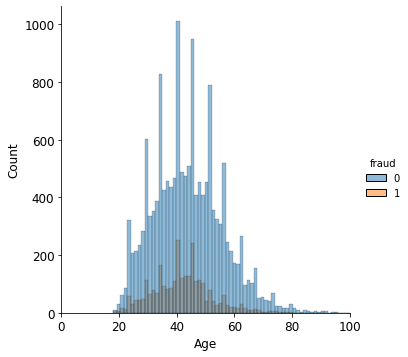

In [152]:
plt.figure(figsize=(8,6))
sns.displot(x='age_of_driver',hue='fraud',kind='hist',data=df)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlim(0,100)
plt.savefig(folder + 'age' +'.png',dpi=200)

In [162]:
for column in list(df.columns):
    print(column, len(df[column].unique()))

claim_number 17998
age_of_driver 87
gender 2
marital_status 3
safty_rating 100
annual_income 2693
high_education_ind 2
address_change_ind 2
living_status 2
zip_code 276
claim_date 731
claim_day_of_week 7
accident_site 3
past_num_of_claims 7
witness_present_ind 3
liab_prct 101
channel 3
policy_report_filed_ind 2
claim_est_payout 17982
age_of_vehicle 18
vehicle_category 3
vehicle_price 17998
vehicle_color 7
vehicle_weight 17998
fraud 2


In [164]:
# sns.pairplot(data=df)

In [266]:
len(df.claim_date.unique())

731

## baseline model 



In [924]:
features = list(df.columns)
for column in ['fraud','claim_number','claim_date']:
    features.remove(column)

target = 'fraud'
X = df[features]
y = df['fraud']

In [925]:
y.unique()

array([0, 1])

In [926]:
from sklearn.model_selection import train_test_split

In [927]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [928]:
class Base_Transformer():
    def fit(self,X,y=None):
        df = pd.DataFrame()
        df = pd.get_dummies(X,drop_first=True)
        self.mean = df.mean()
        
    def transform(self,X,y=None):
        df = pd.DataFrame()
        df = pd.get_dummies(X,drop_first=True)
        return df.fillna(self.mean)
    
    def fit_transform(self,X,y=None):
        self.fit(X,y)
        return self.transform(X,y)
        
    

        
        

In [929]:
bf = Base_Transformer()
bf_X = bf.fit_transform(X_train,y_train)
# tf_X.info()

In [930]:
from sklearn.ensemble import RandomForestClassifier

In [931]:
from sklearn.pipeline import Pipeline

In [932]:
steps = [('bf',Transformer()),
        ('rf',RandomForestClassifier(n_estimators=10,random_state=101))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)

In [933]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [934]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix, plot_confusion_matrix

In [937]:
print(classification_report_imbalanced(y_test,y_test_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.85      0.99      0.04      0.91      0.20      0.04      4552
          1       0.40      0.04      0.99      0.07      0.20      0.03       845

avg / total       0.78      0.84      0.19      0.78      0.20      0.04      5397



In [806]:
balanced_accuracy_score(y_test,y_test_pred)

0.5141443776583022

In [936]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10621
           1       1.00      0.87      0.93      1970

    accuracy                           0.98     12591
   macro avg       0.99      0.93      0.96     12591
weighted avg       0.98      0.98      0.98     12591



/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


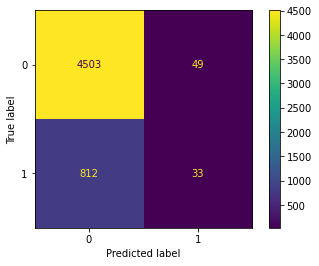

In [804]:
plot_confusion_matrix(model,X_test,y_test)

/Users/SFP5a/Library/Python/3.10/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


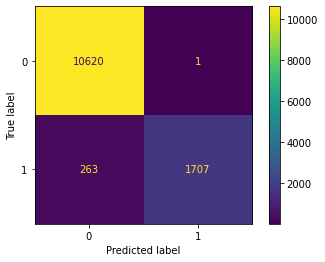

In [805]:
plot_confusion_matrix(model,X_train,y_train)

## model_1 

### EDA

#### visualize date related features

In [275]:
# transform date
claim_date = pd.to_datetime(df.claim_date)
claim_year = claim_date.dt.year
claim_month = claim_date.dt.month
claim_day = claim_date.dt.day
print('year',claim_year.unique())
print('month',claim_month.unique())
print('day',claim_day.unique())

year [2016 2015]
month [12  2  5 10 11  3  1  9  7  4  6  8]
day [16 12  6  5 27 14  7 31  3 11 20 30 19 23 25 24 26  9  4 13 15  2 10  1
 18  8 21 22 29 17 28]


In [280]:
df_date = df[['fraud','claim_day_of_week']]
df_date['year'] = claim_year
df_date['month'] = claim_month
df_date['day'] = claim_day
df_date.head()

/var/folders/d9/m8w0rn2n6wv40ms83wcdcqs00000gp/T/ipykernel_20254/3117155938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['year'] = claim_year
/var/folders/d9/m8w0rn2n6wv40ms83wcdcqs00000gp/T/ipykernel_20254/3117155938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date['month'] = claim_month
/var/folders/d9/m8w0rn2n6wv40ms83wcdcqs00000gp/T/ipykernel_20254/3117155938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,fraud,claim_day_of_week,year,month,day
0,0,Friday,2016,12,16
1,0,Thursday,2015,2,12
2,1,Tuesday,2016,12,6
3,1,Thursday,2016,5,5
4,0,Tuesday,2015,10,27


<AxesSubplot:xlabel='day', ylabel='count'>

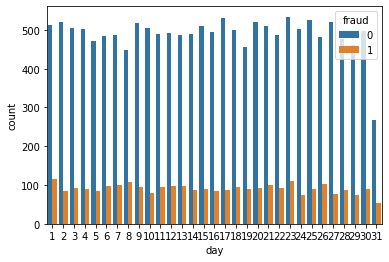

In [279]:
sns.countplot(x='day',hue='fraud',data=df_date)

<AxesSubplot:xlabel='claim_day_of_week', ylabel='count'>

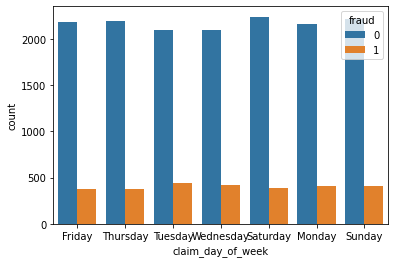

In [281]:
sns.countplot(x='claim_day_of_week',hue='fraud',data=df_date)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

#### Visualize Insurer related features

In [352]:
df_insurer = df[['age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code','past_num_of_claims','fraud']]

In [457]:
df_insurer.shape

(17998, 11)

(0.0, 100.0)

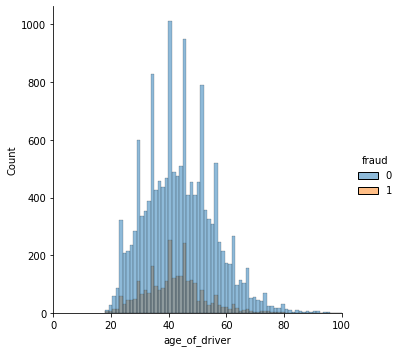

In [296]:
sns.displot(x='age_of_driver',hue='fraud',data=df_insurer)
plt.xlim(0,100)

In [295]:
df.loc[df['age_of_driver'] >= 100]  # the samples can be dropped

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
25,38,200,M,1.0,60,52988,1,1,Rent,85020,12/26/2015,Saturday,Highway,0,0.0,85,Phone,1,5782.266662,5.0,Compact,21503.302070,other,21437.33521,0
70,111,133,M,1.0,60,48905,1,1,Own,15014,8/26/2015,Wednesday,Local,0,0.0,22,Broker,1,5922.919482,7.0,Medium,7626.946942,blue,24659.77971,0
663,1096,100,F,1.0,83,46066,1,1,Own,85007,1/22/2016,Friday,Local,0,1.0,34,Phone,1,4112.137481,5.0,Medium,20972.912580,white,16141.89140,0
1217,2005,229,M,1.0,52,54333,1,0,Rent,15033,4/25/2016,Monday,Highway,2,0.0,31,Broker,1,5025.442762,6.0,Compact,29133.038610,gray,19643.50895,1
14078,23404,113,F,1.0,79,47273,1,0,Own,85033,9/20/2015,Sunday,Local,4,1.0,93,Broker,0,5175.440125,6.0,Large,19407.302320,white,12325.66136,0


In [463]:
df_insurer = df_insurer.loc[df_insurer['age_of_driver']<100]
df_insurer.shape

(17988, 11)

In [299]:
df.loc[df_insurer.marital_status.isnull()]
# can drop, since all negative
# fill with KNN?

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
2425,4046,59,F,NaN,78,40785,1,0,Own,15033,2/12/2015,Thursday,Parking Lot,0,0.0,45,Broker,1,5880.659059,4.0,Large,9792.047015,other,27196.23877,0
4081,6805,33,F,NaN,93,34978,1,1,Own,50033,6/1/2015,Monday,Highway,1,1.0,72,Phone,1,1541.188333,5.0,Large,23077.037210,other,13047.20070,0
16430,27400,47,M,NaN,78,38500,1,1,Own,15030,8/25/2016,Thursday,Local,0,1.0,50,Online,1,6199.250322,3.0,Medium,26226.732090,gray,12273.13255,0
17065,28469,80,M,NaN,75,43815,1,0,Rent,15022,5/4/2015,Monday,Local,0,0.0,32,Broker,1,2473.074798,2.0,Compact,21650.912480,black,16007.28156,0
17236,28746,56,M,NaN,92,40261,1,1,Rent,20152,3/5/2015,Thursday,Local,0,0.0,97,Broker,0,5980.566021,5.0,Compact,34612.072880,red,10429.53196,0


In [460]:
df_insurer = df_insurer.dropna(subset = 'marital_status',axis=0)
df_insurer.shape

(17993, 11)

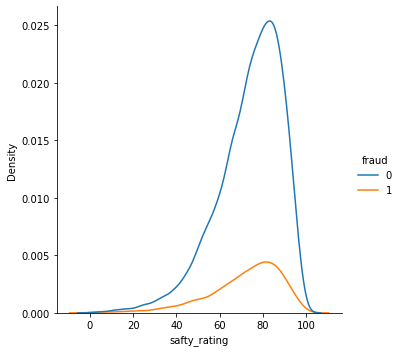

In [302]:
sns.displot(x='safty_rating',hue='fraud',data=df_insurer,kind='kde')

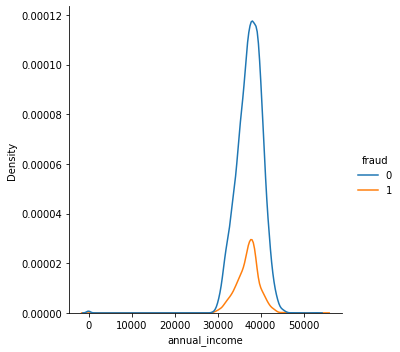

In [303]:
sns.displot(x='annual_income',hue='fraud',data=df_insurer,kind='kde')

<AxesSubplot:xlabel='high_education_ind', ylabel='count'>

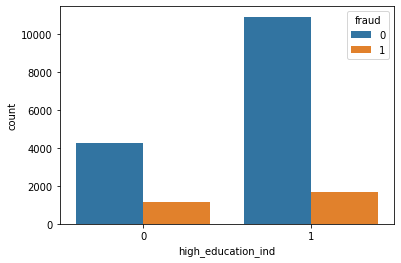

In [305]:
#low edu more likely fraud
sns.countplot(x='high_education_ind',hue='fraud',data=df_insurer)

In [313]:
low_edu_fraud = len(df_insurer.loc[(df_insurer['high_education_ind']==0) & (df_insurer['fraud']==1)])
low_edu_all = len(df_insurer.loc[(df_insurer['high_education_ind']==0)]) 
low_edu_fraud/low_edu_all *100

21.093461396379755

In [314]:
high_edu_fraud = len(df_insurer.loc[(df_insurer['high_education_ind']==1) & (df_insurer['fraud']==1)])
high_edu_all = len(df_insurer.loc[(df_insurer['high_education_ind']==1)]) 
high_edu_fraud/high_edu_all *100

13.302606484424667

<AxesSubplot:xlabel='address_change_ind', ylabel='count'>

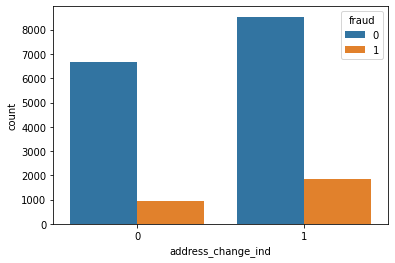

In [315]:
#change address more likely fraud
sns.countplot(x='address_change_ind',hue='fraud',data=df_insurer)

In [318]:
no_change_fraud = len(df_insurer.loc[(df_insurer['address_change_ind']==0) & (df_insurer['fraud']==1)])
no_change_all = len(df_insurer.loc[(df_insurer['address_change_ind']==0)]) 
no_change_fraud/no_change_all *100

12.578864353312301

In [319]:
change_fraud = len(df_insurer.loc[(df_insurer['address_change_ind']==1) & (df_insurer['fraud']==1)])
change_all = len(df_insurer.loc[(df_insurer['address_change_ind']==1)]) 
change_fraud/no_change_all *100

24.4348054679285

In [321]:
#living status
#renting has slightly higher risk
df_insurer.living_status.unique()

array(['Rent', 'Own'], dtype=object)

<AxesSubplot:xlabel='living_status', ylabel='count'>

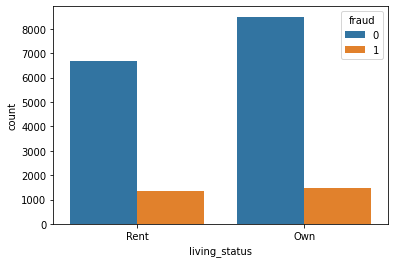

In [322]:
sns.countplot(x='living_status',hue='fraud',data=df_insurer)

In [323]:
rent_fraud = len(df_insurer.loc[(df_insurer['living_status']=='Rent') & (df_insurer['fraud']==1)])
rent_all = len(df_insurer.loc[(df_insurer['living_status']=='Rent')]) 
rent_fraud/rent_all *100

16.72686511396189

In [324]:
own_fraud = len(df_insurer.loc[(df_insurer['living_status']=='Own') & (df_insurer['fraud']==1)])
own_all = len(df_insurer.loc[(df_insurer['living_status']=='Own')]) 
own_fraud/own_all *100

14.775804995486006

In [470]:
#zip_code
# can use fraud rate to code
len(df.zip_code.unique())

276

In [471]:
df[df['zip_code']== 0]

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
359,607,43,F,1.0,91,37642,1,1,Rent,0,6/14/2015,Sunday,Local,0,0.0,50,Online,1,1689.083898,NaN,Medium,38113.91342,black,36952.736520,0
639,1057,88,M,1.0,59,44773,0,1,Rent,0,7/10/2016,Sunday,Highway,0,0.0,23,Broker,0,5444.281501,5.0,Large,19978.05576,black,11283.398880,0
1062,1735,47,M,0.0,85,38509,1,1,Own,0,2/21/2016,Sunday,Local,0,0.0,98,Broker,0,3669.972666,5.0,Large,28024.39222,white,14233.198130,0
1186,1957,43,F,1.0,77,37598,0,1,Own,0,5/14/2016,Saturday,Parking Lot,0,1.0,36,Phone,1,7306.185751,7.0,Medium,21485.68133,other,12841.489510,0
2581,4309,33,M,1.0,77,34974,1,1,Own,0,12/9/2015,Wednesday,Parking Lot,0,0.0,0,Broker,1,4167.803557,4.0,Large,24771.33834,black,4715.069667,0
2786,4658,39,F,1.0,93,36637,1,1,Own,0,9/16/2015,Wednesday,Local,0,0.0,100,Broker,0,6228.872802,6.0,Compact,24585.58907,white,22612.331210,0
2887,4823,41,F,0.0,69,37133,1,1,Own,0,1/12/2015,Monday,Parking Lot,0,0.0,3,Online,0,5392.616758,4.0,Large,34837.32526,other,18984.885420,0
3282,5487,34,M,1.0,89,35255,0,0,Rent,0,8/7/2015,Friday,Local,0,1.0,47,Broker,0,3883.543778,7.0,Compact,27189.81885,other,6583.348788,0
3615,6029,38,F,1.0,56,36371,1,1,Own,0,5/12/2015,Tuesday,Highway,0,1.0,16,Broker,0,6461.269770,6.0,Compact,37488.64998,other,17776.316520,0
3793,6331,44,M,1.0,80,37831,1,0,Own,0,11/12/2016,Saturday,Local,0,0.0,100,Phone,0,2633.974768,1.0,Large,37650.91774,other,13970.595590,0


<AxesSubplot:xlabel='zip_code'>

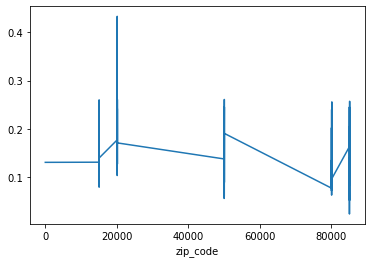

In [349]:
df_insurer.groupby('zip_code')['fraud'].mean().plot()


In [468]:
df_insurer.groupby('zip_code')['fraud'].mean().to_dict()

{0: 0.13043478260869565,
 15001: 0.13074204946996468,
 15003: 0.16091954022988506,
 15004: 0.25,
 15005: 0.225,
 15006: 0.17857142857142858,
 15007: 0.17391304347826086,
 15009: 0.1875,
 15010: 0.15723270440251572,
 15012: 0.17028985507246377,
 15014: 0.18604651162790697,
 15015: 0.13333333333333333,
 15017: 0.1590909090909091,
 15018: 0.15217391304347827,
 15019: 0.14583333333333334,
 15020: 0.1568627450980392,
 15021: 0.16759776536312848,
 15022: 0.18518518518518517,
 15024: 0.12244897959183673,
 15025: 0.13983050847457626,
 15026: 0.19047619047619047,
 15027: 0.1111111111111111,
 15028: 0.17543859649122806,
 15030: 0.11627906976744186,
 15031: 0.18181818181818182,
 15032: 0.1206896551724138,
 15033: 0.10810810810810811,
 15034: 0.0975609756097561,
 15035: 0.15,
 15037: 0.08163265306122448,
 15038: 0.08571428571428572,
 15042: 0.16363636363636364,
 15043: 0.2037037037037037,
 15044: 0.22641509433962265,
 15045: 0.21052631578947367,
 15046: 0.20192307692307693,
 15047: 0.1489361702127

In [354]:
# number of claims
#can use fraud rate to encode
df_insurer['past_num_of_claims'].unique()

array([1, 0, 3, 5, 2, 4, 6])

<AxesSubplot:xlabel='past_num_of_claims', ylabel='count'>

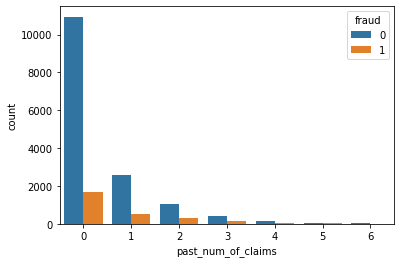

In [355]:
sns.countplot(x='past_num_of_claims',hue='fraud',data=df_insurer)

<AxesSubplot:xlabel='past_num_of_claims', ylabel='count'>

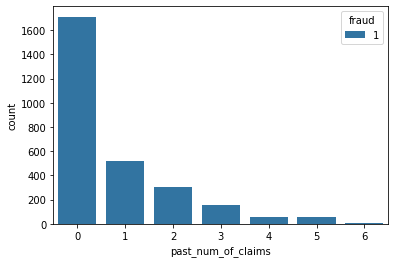

In [361]:
sns.countplot(x='past_num_of_claims',hue='fraud',data=df_insurer[df_insurer['fraud']== 1])

<AxesSubplot:xlabel='past_num_of_claims'>

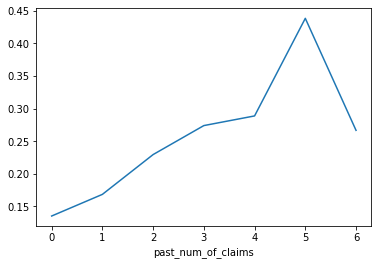

In [363]:
df_insurer.groupby('past_num_of_claims')['fraud'].mean().plot()

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

#### visualize car related features 

In [445]:
df_vehicle = df[['age_of_vehicle','vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud']]

In [366]:
# normal distribution, can fillna with mean
df_vehicle.age_of_vehicle.unique()

array([ 9.,  4.,  3.,  7.,  8.,  5.,  6.,  2., 10.,  1., 12., 13., 11.,
        0., nan, 14., 16., 15.])

In [368]:
df_vehicle.loc[df_vehicle.age_of_vehicle.isnull()]

,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
359,NaN,Medium,38113.913420,black,36952.73652,0
396,NaN,Large,15031.179650,blue,27652.80573,0
3246,NaN,Compact,7909.677821,black,51000.58893,1
3285,NaN,Medium,13162.783910,white,10861.12944,0
4606,NaN,Compact,22874.609020,blue,36343.28391,1
10139,NaN,Medium,10827.602690,white,25119.46125,0
12478,NaN,Large,21856.497600,red,36417.67936,0
16207,NaN,Compact,41141.914700,silver,19346.57938,0


In [369]:
df_vehicle.age_of_vehicle.mean()

5.008060033351862

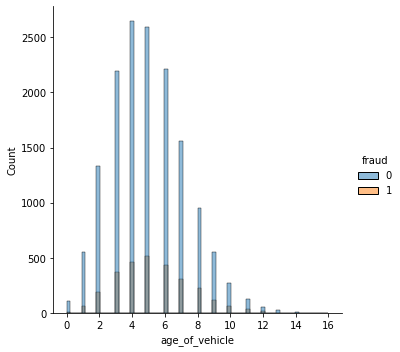

In [382]:
sns.displot(x='age_of_vehicle',hue='fraud',kind='hist',data=df_vehicle)

<AxesSubplot:xlabel='age_of_vehicle'>

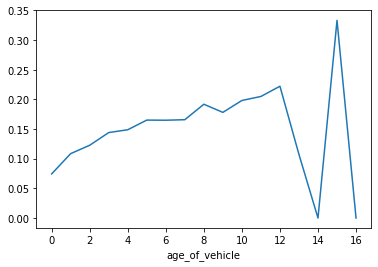

In [383]:
df_vehicle.groupby('age_of_vehicle')['fraud'].mean().plot()

In [384]:
#vehicle category not much correlation, can be dummy coder
df.vehicle_category.unique()

array(['Compact', 'Large', 'Medium'], dtype=object)

<AxesSubplot:xlabel='vehicle_category', ylabel='count'>

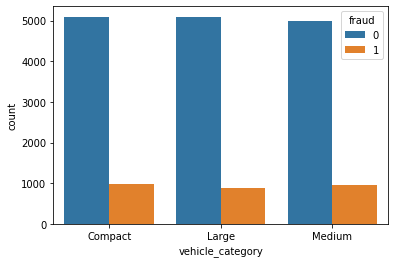

In [386]:
sns.countplot(x='vehicle_category',hue='fraud',data=df_vehicle)

In [393]:
#vehicle price numerical data
df.vehicle_price.unique()

17998

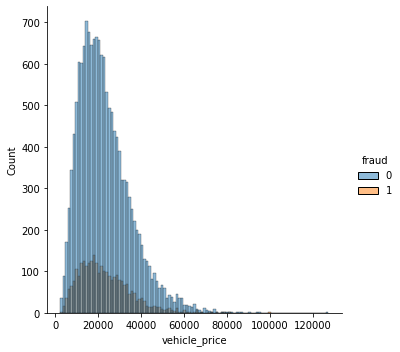

In [399]:
sns.displot(x='vehicle_price',hue='fraud',kind='hist',data=df_vehicle)

In [400]:
#vehicle_color, dummy encoder
df.vehicle_color.unique()

array(['white', 'other', 'gray', 'black', 'red', 'blue', 'silver'],
      dtype=object)

<AxesSubplot:xlabel='vehicle_color', ylabel='count'>

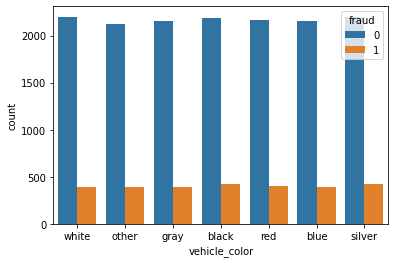

In [401]:
sns.countplot(x='vehicle_color',hue='fraud',data=df_vehicle)

In [403]:
#vehicle_weight
len(df.vehicle_weight.unique())

17998

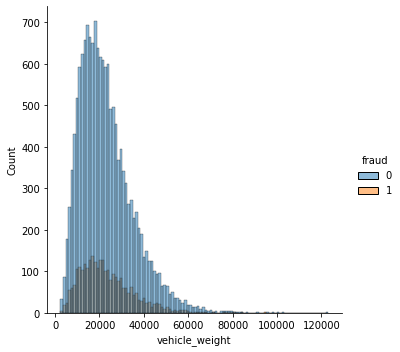

In [404]:
sns.displot(x='vehicle_weight',hue='fraud',kind='hist',data=df_vehicle)

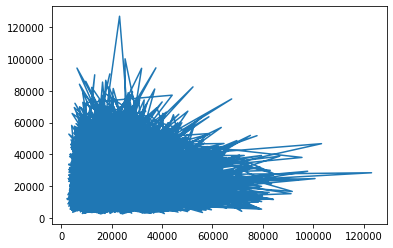

In [406]:
#no collinearity
plt.plot(df.vehicle_weight,df.vehicle_price)

#### visualize other features

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [446]:
df_other = df[['accident_site','witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout','fraud']]

In [447]:
#accident_site, use fraud rate or onhot
df_other.accident_site.unique()

array(['Local', 'Highway', 'Parking Lot'], dtype=object)

<AxesSubplot:xlabel='accident_site', ylabel='count'>

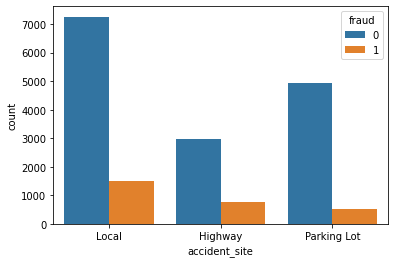

In [448]:
sns.countplot(x='accident_site',hue='fraud',data=df_other)

In [450]:
df_other[df_other['accident_site']=='Local']['fraud'].mean()

0.17221715328467152

In [451]:
df_other[df_other['accident_site']=='Highway']['fraud'].mean()

0.20569451836083022

In [452]:
df_other[df_other['accident_site']=='Parking Lot']['fraud'].mean()

0.09740497076023392

In [409]:
#witness_present.  since the fraud rate of na is closer to '1'category, can fillna with 1
df_other.witness_present_ind.unique()

array([ 0.,  1., nan])

<AxesSubplot:xlabel='witness_present_ind', ylabel='count'>

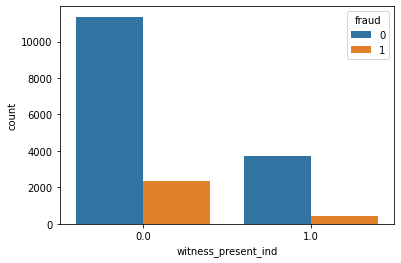

In [411]:
sns.countplot(x='witness_present_ind',hue='fraud',data=df_other)

In [419]:
df_other[df.witness_present_ind.isnull()]['fraud'].mean()

0.12121212121212122

In [417]:
df_other[df['witness_present_ind']==0]['fraud'].mean()

0.17156612444379604

In [418]:
df_other[df['witness_present_ind']==1]['fraud'].mean()

0.10777002646139043

In [420]:
#liab_prct. not really know what means
df_other.liab_prct.unique()

array([ 74,  79,   0,  99,   7,  64,  50,  95,   3,   9,  19,   8,  98,
        12,  57,  81,  71,  28,  59,  34,   1,   2,  85,  27,  17,  31,
        60,  54,  77,  78,  68,  62,  67,  83,  84,  97,  49,  37,  36,
         5,  66,  42,  76,  11,  40,  25,  93,  48,  22,   4,  69,  61,
        10,  39,  92,  46,  45,  52,  96,  88,  87,  55,  75,  32,  73,
        94,  80,  35,  43,   6,  15,  91,  38,  13, 100,  70,  47,  82,
        18,  58,  89,  30,  21,  26,  29,  56,  86,  63,  65,  20,  53,
        51,  44,  33,  14,  90,  23,  72,  24,  16,  41])

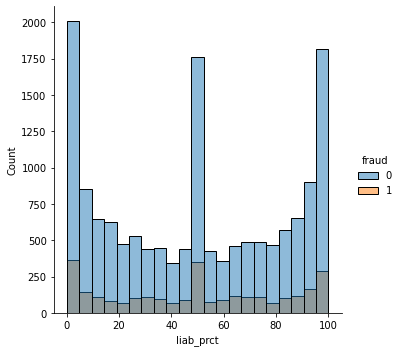

In [425]:
sns.displot(x='liab_prct',hue='fraud',data=df_other)

In [427]:
#channel
df_other.channel.unique()

array(['Broker', 'Online', 'Phone'], dtype=object)

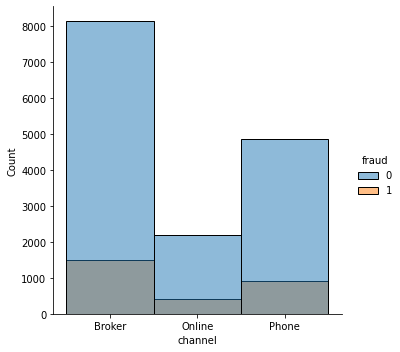

In [428]:
sns.displot(x='channel',hue='fraud',data=df_other)

In [429]:
df_other[df['channel']=='Broker']['fraud'].mean()

0.15478044222983495

In [431]:
df_other[df['channel']=='Online']['fraud'].mean()

0.15651503469545103

In [432]:
df_other[df['channel']=='Phone']['fraud'].mean()

0.15924449835383817

In [433]:
#police report
df['policy_report_filed_ind'].unique()

array([0, 1])

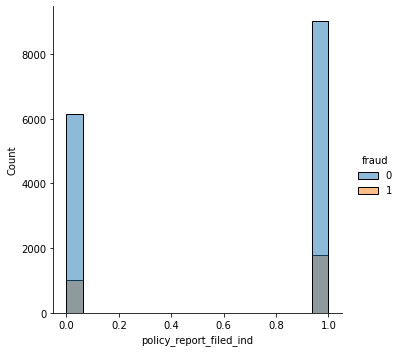

In [434]:
sns.displot(x='policy_report_filed_ind',hue='fraud',data=df_other)

In [435]:
df_other[df['policy_report_filed_ind']==1]['fraud'].mean()

0.1653871057256498

In [436]:
df_other[df['policy_report_filed_ind']==0]['fraud'].mean()

0.14303603728955058

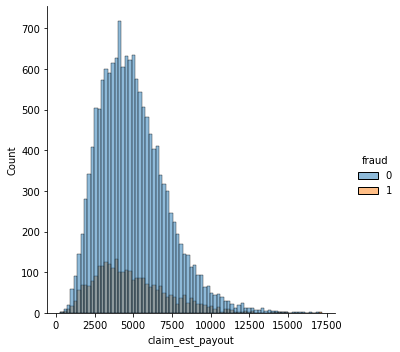

In [437]:
#'claim_est_payout' fillna with mean
sns.displot(x='claim_est_payout',hue='fraud',data=df_other)

In [439]:
df_other[df_other['fraud']==1]['claim_est_payout'].sum()

13760028.8182191

In [441]:
df_other[df_other['fraud']==1]['claim_est_payout'].sum()/df_other['claim_est_payout'].sum()

0.15379537582128916

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

In [443]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')

#### feature summary


'claim_number',  -- del
'age_of_driver',  --num, drop >=100
'gender',         --dummy
'marital_status', -- dummy, dropna
       'safty_rating', -- change column name,  num
    'annual_income', -- num
    'high_education_ind', -- one hot, fraud rate to encode
       'address_change_ind',  -- on hot or fraud rate to encode
        'living_status', -- one hot or fraud rate 
        'zip_code', -- fraud rate
        'claim_date', -- can get year, month, day column, or drop
       'claim_day_of_week', -- one hot
    'accident_site',   -- one hot or fraud rate
    'past_num_of_claims', -- fraud rate
       'witness_present_ind', -- fillna with 1
        'liab_prct',  -- num, no change
        'channel',   -- one hot
       'policy_report_filed_ind', -- no change
    'claim_est_payout',  -- num, fillna with mean
    'age_of_vehicle',  -- fillna with mean
       'vehicle_category', -- one hot
        'vehicle_price',  -- num, no change
        'vehicle_color', -- one hot
        'vehicle_weight', -- one hot
       'fraud'

In [466]:
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,2/12/2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,12/6/2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,5/5/2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


###  Transformer 

In [816]:
df = df.dropna(subset='marital_status',axis = 0)
df = df.loc[df['age_of_driver']<100]
features = list(df.columns)
for column in ['fraud','claim_number','claim_date']:
    features.remove(column)

target = 'fraud'
X = df[features]
y = df['fraud']

In [817]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [818]:
def zip_code_tranformer(X,y):
    df = pd.DataFrame()
    df['zip_code'] = X.zip_code
    df['fraud'] = y
    return df.groupby('zip_code')['fraud'].mean().to_dict()
        

In [819]:
class Transformer():
    def fit(self,X,y=None):
        df = pd.DataFrame()
        # Dummy encoder for categorical features
        df = pd.get_dummies(X[['gender','living_status','claim_day_of_week','accident_site','channel',
                              'vehicle_category','vehicle_color']],drop_first=True)
        # num features
        df['age_of_driver'] = X['age_of_driver']
        df['marital_status'] =X['marital_status']
        df['safty_rating'] = X['safty_rating']
        df['annual_income'] = X['annual_income']
        df['high_education_ind'] = X['high_education_ind']
        df['address_change_ind'] = X['address_change_ind']
        df['past_num_of_claims'] = X['past_num_of_claims']
        df['witness_present_ind'] = X['witness_present_ind']
        df['liab_prct'] = X['liab_prct']
        df['policy_report_filed_ind'] =X['policy_report_filed_ind']
        df['claim_est_payout'] = X['claim_est_payout']
        df['age_of_vehicle'] =X['age_of_vehicle']
        df['vehicle_price'] = X['vehicle_price']
        df['vehicle_weight'] = X['vehicle_weight']
        
        #zip code map fraud rate
        self.zip_code_fraud = self.zip_code_transformer(X,y)
        df['zip_code'] = X.zip_code.map(self.zip_code_fraud)
        
        #for fill na
        # 'witness_present_ind' 1
        #'claim_est_payout',  -- num, fillna with mean
#     'age_of_vehicle',  -- fillna with mean
        self.payout = df['claim_est_payout'].mean()
        self.age_vehicle = df['age_of_vehicle'].mean()
        self.witness = 1

        
    def transform(self,X,y=None):
        df = pd.DataFrame()
        # Dummy encoder for categorical features
        df = pd.get_dummies(X[['gender','living_status','claim_day_of_week','accident_site','channel',
                              'vehicle_category','vehicle_color']],drop_first=True)
        # num features
        df['age_of_driver'] = X['age_of_driver']
        df['marital_status'] =X['marital_status']
        df['safty_rating'] = X['safty_rating']
        df['annual_income'] = X['annual_income']
        df['high_education_ind'] = X['high_education_ind']
        df['address_change_ind'] = X['address_change_ind']
        df['past_num_of_claims'] = X['past_num_of_claims']
        df['witness_present_ind'] = X['witness_present_ind']
        df['liab_prct'] = X['liab_prct']
        df['policy_report_filed_ind'] =X['policy_report_filed_ind']
        df['claim_est_payout'] = X['claim_est_payout']
        df['age_of_vehicle'] =X['age_of_vehicle']
        df['vehicle_price'] = X['vehicle_price']
        df['vehicle_weight'] = X['vehicle_weight']
        
        #zip code map fraud rate
        df['zip_code'] = X.zip_code.map(self.zip_code_fraud)
        
        #fill na
        values = {'witness_present_ind':1, 'claim_est_payout':self.payout,'age_of_vehicle':self.age_vehicle}
        return df.fillna(value = values)

    
    def fit_transform(self,X,y=None):
        self.fit(X,y)
        return self.transform(X,y)
        
    def zip_code_transformer(self,X,y):
        df = pd.DataFrame()
        df['zip_code'] = X.zip_code
        df['fraud'] = y
        return df.groupby('zip_code')['fraud'].mean().to_dict()
        
        
        
        

In [820]:
tf = Transformer()

In [821]:
tf_X = tf.fit_transform(X_train,y_train)
tf_X.shape

(12591, 35)